In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
from ggplot import *
import pymysql
import warnings
warnings.filterwarnings('ignore')
pysqldf = lambda q: sqldf(q, globals())
from pandasql import *
import pymysql
from pandasql import sqldf 
import plotnine as p9
import matplotlib.pyplot as plt


In [5]:
credentials = {
    'host':'54.229.161.171',
    'user':'candidate',
    'password':'rSqmCdIhzV'
}
connection = pymysql.connect(**credentials)

OperationalError: (2003, "Can't connect to MySQL server on '54.229.161.171' (timed out)")

In [14]:
# query=("""SELECT c.* ,l.loan_id,l.date_issued ,l.date_due,l.amount,
#       l.interest ,l.penalties,l.status,p.payment_id,p.payment_date,
#       p.payment_amount 
#       FROM 4gcapital.customers  c 
#       left join loans l on c.customer_id =l.customer_id 
#       left join payments p on l.loan_id=p.loan_id 
#       where l.customer_id=c.customer_id;
# """)
# data = pd.read_sql(query, connection)


data=pd.read_csv('data')
data=pysqldf("""SELECT * 
        ,strftime('%Y-%m-01',date_added) month_date_added 
        ,strftime('%Y-%m-01',payment_date) month_payment_date 
        ,strftime('%Y-%m-01',date_issued) month_date_issued 
        ,strftime('%Y',date_added) year_date_added 
        FROM data ;""")
data

,Unnamed: 0,customer_id,station_id,date_added,business_type,number_employees,number_dependants,weekly_number_customers,current_stock_value,weekly_business_income,...,penalties,status,payment_id,loan_id.1,payment_date,payment_amount,month_date_added,month_payment_date,month_date_issued,year_date_added
0,0,100033,5,2017-01-03,retail,1,0,22,146.75,419.90,...,0.0,settled,100001.0,1000033.0,2017-01-03,95.05,2017-01-01,2017-01-01,2017-01-01,2017
1,1,100006,4,2017-01-02,retail,1,0,18,314.81,291.70,...,0.0,settled,100002.0,1000006.0,2017-01-04,137.88,2017-01-01,2017-01-01,2017-01-01,2017
2,2,100094,10,2017-01-05,retail,0,3,15,357.11,149.61,...,12.0,settled,100003.0,1000094.0,2017-01-05,3.20,2017-01-01,2017-01-01,2017-01-01,2017
3,3,100083,7,2017-01-05,retail,0,0,18,213.48,95.21,...,0.0,settled,100004.0,1000083.0,2017-01-05,17.55,2017-01-01,2017-01-01,2017-01-01,2017
4,4,100030,4,2017-01-03,retail,0,4,17,156.38,128.53,...,0.0,settled,100005.0,1000030.0,2017-01-05,24.50,2017-01-01,2017-01-01,2017-01-01,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76141,76141,110738,15,2018-12-26,service,1,3,4,0.00,102.47,...,0.0,disbursed,NaN,NaN,None,NaN,2018-12-01,None,2018-12-01,2018
76142,76142,110775,19,2018-12-27,service,3,2,8,0.00,297.95,...,0.0,disbursed,NaN,NaN,None,NaN,2018-12-01,None,2018-12-01,2018
76143,76143,110782,22,2018-12-27,service,5,3,12,0.00,247.18,...,0.0,disbursed,NaN,NaN,None,NaN,2018-12-01,None,2018-12-01,2018
76144,76144,110831,26,2018-12-28,service,0,0,3,0.00,67.27,...,0.0,disbursed,NaN,NaN,None,NaN,2018-12-01,None,2018-12-01,2018


# New Stations 

## New Station Added

In [93]:

df_stations_by_month=pysqldf("""SELECT count(distinct station_id) Number_of_stations ,
         month_date_added 
        FROM data 
        group by  2;""")
df_stations_by_month

,Number_of_stations,month_date_added
0,10,2017-01-01
1,10,2017-02-01
2,10,2017-03-01
3,10,2017-04-01
4,10,2017-05-01
5,15,2017-06-01
6,15,2017-07-01
7,15,2017-08-01
8,15,2017-09-01
9,15,2017-10-01


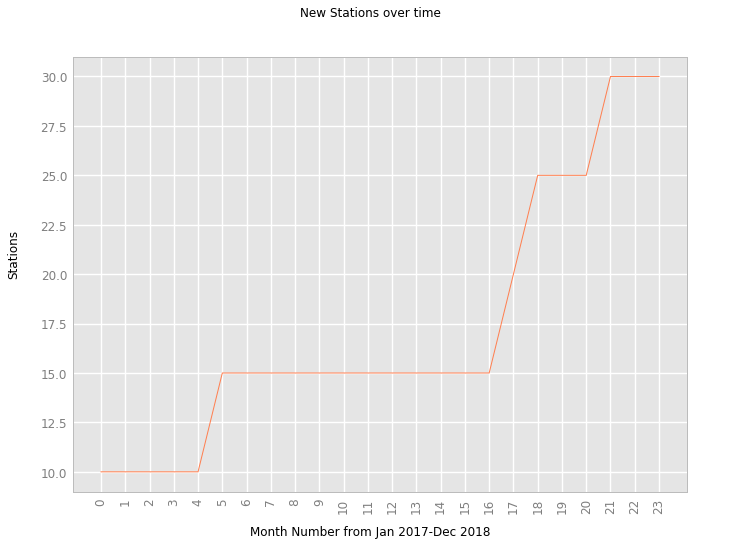

<ggplot: (7570046791)>

In [343]:
my_custom_theme = p9.theme(axis_text_x = p9.element_text(angle=90, 
                                                        )
                           )
my_custom_theme_2 = theme(axis_text_x = element_text(angle=90, 
                                                        )
                           )


ggplot(df_stations_by_month, aes('month_date_added','Number_of_stations')) + \
    geom_line(color='coral')+ my_custom_theme_2+ggtitle("New Stations over time") + xlab("Month Number from Jan 2017-Dec 2018") + ylab("Stations")



#### The above line chart shows stations added /created by month  by overally since 2017 to date we had 30 differecnt uniqie stations

#  New Customers 

## New Customers Added

In [309]:
df_customers_by_month=pysqldf("""SELECT cast(count(distinct customer_id) as interger) Number_of_Customers 
        ,month_date_added 
        FROM data 
        group by  2;""")
df_customers_by_month

,Number_of_Customers,month_date_added
0,445,2017-01-01
1,315,2017-02-01
2,312,2017-03-01
3,238,2017-04-01
4,243,2017-05-01
5,492,2017-06-01
6,405,2017-07-01
7,364,2017-08-01
8,299,2017-09-01
9,314,2017-10-01


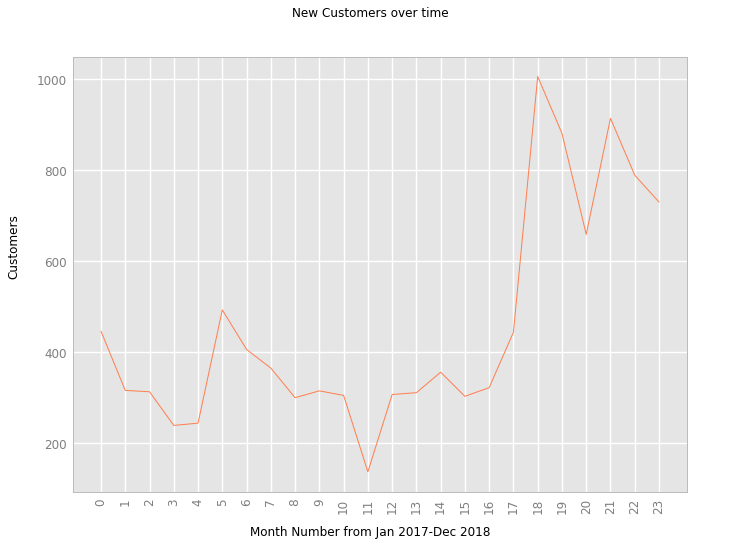

<ggplot: (-9223372029285022106)>

In [342]:
ggplot(df_customers_by_month, aes('month_date_added','Number_of_Customers')) + \
    geom_line(color='coral')+ my_custom_theme_2+ggtitle("New Customers over time") + xlab("Month Number from Jan 2017-Dec 2018") + ylab("Customers")


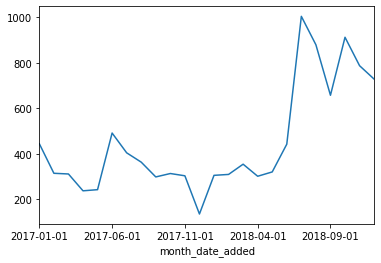

In [311]:
df_customers_by_month.set_index('month_date_added')['Number_of_Customers'].plot()


#### The abouve chart shows new customers added over time  , there are couple of spikes displayed which looks like seasonal spikes , but most of the customers were added in July 2018 , and the least were added in December 2017

##  Customers added by stations over time in 2017

In [21]:
df_customers_by_month_station=pysqldf("""SELECT count(distinct customer_id) Number_of_Customers 
      , month_date_added 
        ,station_id
        FROM data 
        where year_date_added =2017
        group by  2,3;""")
df_customers_by_month_station

,Number_of_Customers,month_date_added,station_id
0,28,2017-01-01,1
1,19,2017-01-01,2
2,15,2017-01-01,3
3,23,2017-01-01,4
4,48,2017-01-01,5
...,...,...,...
150,3,2017-12-01,11
151,7,2017-12-01,12
152,44,2017-12-01,13
153,7,2017-12-01,14


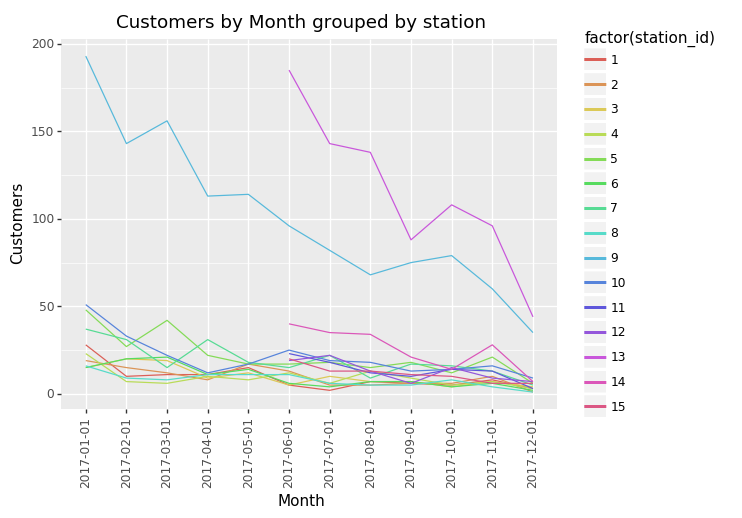

<ggplot: (-9223372029288682492)>

In [292]:

(p9.ggplot(data=df_customers_by_month_station,
           mapping=p9.aes(x='month_date_added',
                          y='Number_of_Customers',
                          color='factor(station_id)',
                         group = 'factor(station_id)'))
    + p9.geom_line()+my_custom_theme+ p9.ggtitle("Customers by Month grouped by station") + p9.xlab("Month") + p9.ylab("Customers")
    
)

#### Above is chart showing numbers of customers added per each station , in each and every month , we can see there exists a trend , which shows that there are more customers in beginning of the year compared to the end of the year.Meaning more customers take out loans in the beginning of the year


## Total Customers  by stations in 2017

In [155]:
df_customers_by_station_2017=pysqldf("""SELECT count(distinct customer_id) Number_of_Customers 
        ,station_id
        FROM data 
        where year_date_added =2017
        group by  2;""")
df_customers_by_station_2017

,Number_of_Customers,station_id
0,111,1
1,117,2
2,119,3
3,109,4
4,263,5
5,117,6
6,229,7
7,95,8
8,1214,9
9,249,10


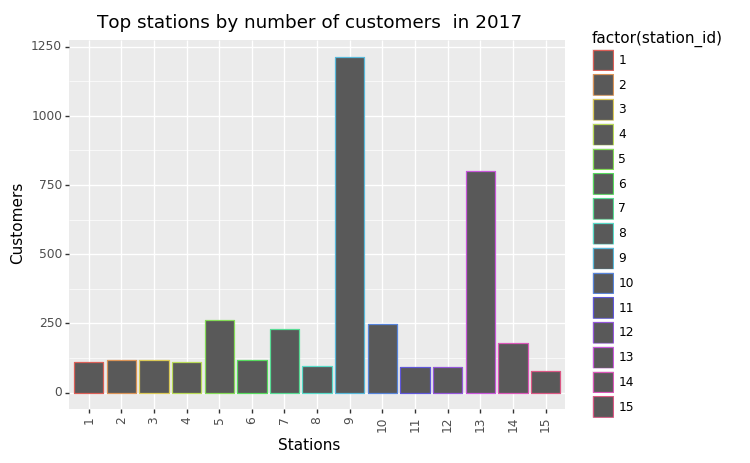

<ggplot: (7552284571)>

In [290]:

(p9.ggplot(data=df_customers_by_station_2017,
           mapping=p9.aes(x='factor(station_id)',
                          y='Number_of_Customers',
                          color='factor(station_id)'
                         ))
    + p9.geom_bar(stat = "identity")+my_custom_theme+
  p9.ggtitle("Top stations by number of customers  in 2017") + p9.xlab("Stations") + p9.ylab("Customers")


    
)

#### In 2017 there were 15 stations ,station 9 was the top perfoming station followed by station 13 and 5

### Deep dive on station 9 in 2017

In [83]:
station_9=pysqldf("""SELECT count(distinct customer_id) Number_of_Customers, 
        business_type,status
        FROM data 
        where year_date_added =2017
        and station_id =9
        group by  2,3;""")
station_9

,Number_of_Customers,business_type,status
0,78,retail,disbursed
1,38,retail,overdue
2,937,retail,settled
3,325,retail,write_off
4,6,service,disbursed
5,5,service,overdue
6,212,service,settled
7,76,service,write_off


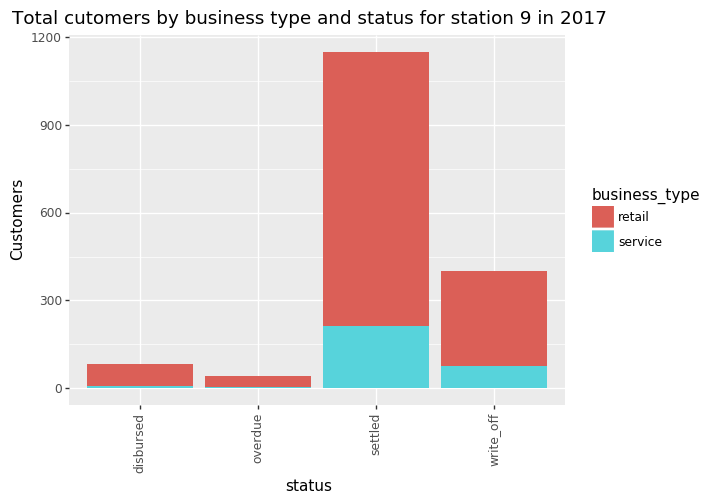

<ggplot: (-9223372029289350670)>

In [297]:


(p9.ggplot(data=station_9,
           mapping=p9.aes(x='factor(status)',
                          y='Number_of_Customers',
                          fill='business_type'))
                         
    + p9.geom_bar(stat = "identity")+my_custom_theme+
  p9.ggtitle("Total cutomers by business type and status for station 9 in 2017") + p9.xlab("status") + p9.ylab("Customers")
        
)

## Customers added by stations in 2018


In [157]:
df_customers_by_station_2018=pysqldf("""SELECT count(distinct customer_id) Number_of_Customers 
        ,station_id
        FROM data 
        where year_date_added =2018
        group by  2;""")
df_customers_by_station_2018

,Number_of_Customers,station_id
0,94,1
1,92,2
2,88,3
3,85,4
4,201,5
5,87,6
6,204,7
7,63,8
8,991,9
9,178,10


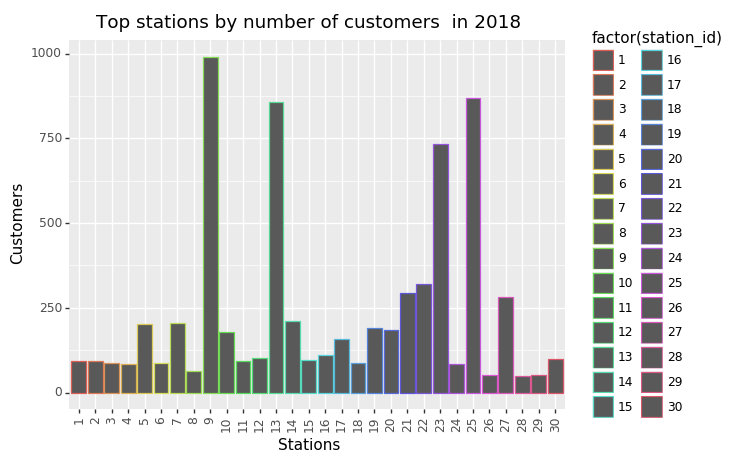

<ggplot: (7564049079)>

In [288]:

(p9.ggplot(data=df_customers_by_station_2018,
           mapping=p9.aes(x='factor(station_id)',
                          y='Number_of_Customers',
                          color='factor(station_id)'
                         ))
    + p9.geom_bar(stat = "identity")+my_custom_theme + 
 p9.ggtitle("Top stations by number of customers  in 2018") + p9.xlab("Stations") + p9.ylab("Customers")
    
)

#### In 2018 there were 30 stations in total ,station 9 was the top perfoming station followed by station 25 and 13



### Deep dive on station 9 in 2018

In [162]:
station_9_2018=pysqldf("""SELECT count(distinct customer_id) Number_of_Customers, 
        business_type,status
        FROM data 
        where year_date_added =2018
        and station_id =9
        group by  2,3;""")
station_9_2018

,Number_of_Customers,business_type,status
0,303,retail,disbursed
1,32,retail,overdue
2,538,retail,settled
3,92,retail,write_off
4,161,service,disbursed
5,24,service,overdue
6,319,service,settled
7,74,service,write_off


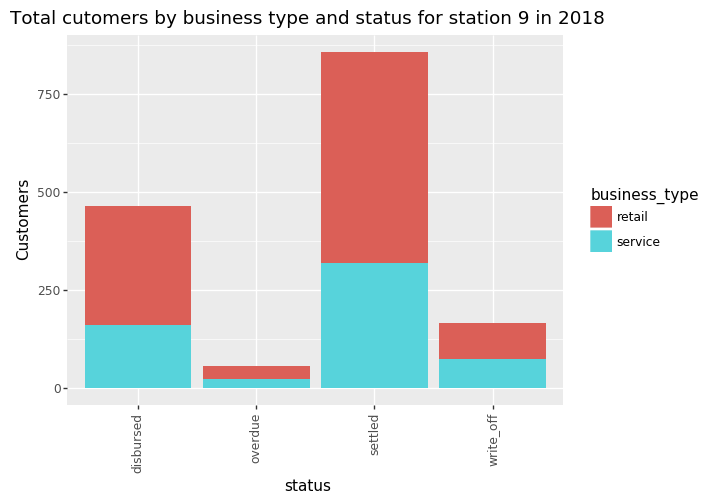

<ggplot: (-9223372029285042765)>

In [298]:


(p9.ggplot(data=station_9_2018,
           mapping=p9.aes(x='factor(status)',
                          y='Number_of_Customers',
                          fill='business_type'))
                         
    + p9.geom_bar(stat = "identity")+my_custom_theme +
  p9.ggtitle("Total cutomers by business type and status for station 9 in 2018") + p9.xlab("status") + p9.ylab("Customers")
    
)

## Total Distinct Customers by loan Status

In [240]:
customers_by_stts =pysqldf("""with a as (select count(distinct customer_id) customers,status
                      from data
                      group by 2
                      order by 1 desc)
                      ,b as (select count(distinct customer_id) Total_customers from data)
                        select * ,round(cast(customers as float)/(cast(Total_customers as float)),4) Ratio from a,b;""")
customers_by_stts

,customers,status,Total_customers,Ratio
0,9675,settled,10877,0.8895
1,4194,disbursed,10877,0.3856
2,2223,write_off,10877,0.2044
3,548,overdue,10877,0.0504


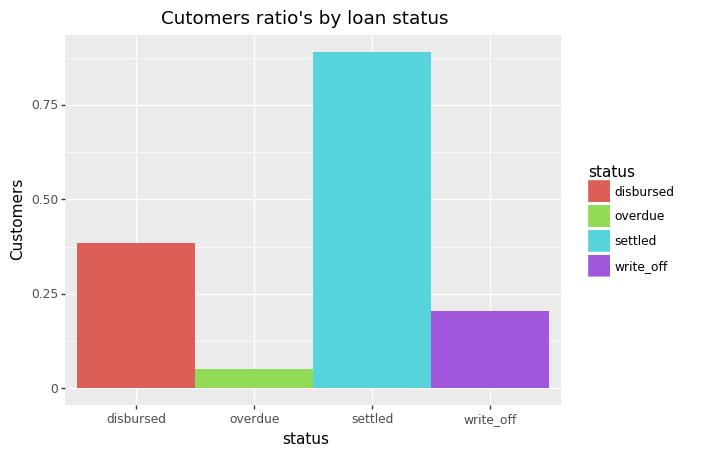

<ggplot: (7567093263)>

In [299]:
(p9.ggplot(data=customers_by_stts,
           mapping=p9.aes(x="status",
                          y='Ratio',
                          fill='status'))
                         
    + p9.geom_bar(width = 1, stat = "identity")+
  p9.ggtitle("Cutomers ratio's by loan status") + p9.xlab("status") + p9.ylab("Customers")
    
    
)



## Total Distinct Customers by Business type

In [300]:
customers_by_bstyp =pysqldf("""with a as (select count(distinct customer_id) customers,business_type
                        from
                      data
                      group by 2
                      order by 1 desc),b as (select count(distinct customer_id) Total_customers from data)
                        select * ,round(cast(customers as float)/Total_customers,4) Ratio from a,b;""")
customers_by_bstyp

,customers,business_type,Total_customers,Ratio
0,7332,retail,10877,0.6741
1,3545,service,10877,0.3259


## Total Distinct Customers by Business type & status

In [234]:
customers_by_bstyp_sttts =pysqldf("""with a as (select count(distinct customer_id) customers,business_type,status
                        from
                      data
                      group by 2,3
                      order by 2 desc),b as (select count(distinct customer_id) Total_customers ,business_type from data group by business_type)
                        select customers,a.business_type,status ,Total_customers,
                        round(cast(customers as float)/cast(Total_customers as float),4) Ratio from a join b on b.business_type=a.business_type  ;""")
customers_by_bstyp_sttts

,customers,business_type,status,Total_customers,Ratio
0,1370,service,disbursed,3545,0.3865
1,210,service,overdue,3545,0.0592
2,3019,service,settled,3545,0.8516
3,727,service,write_off,3545,0.2051
4,2824,retail,disbursed,7332,0.3852
5,338,retail,overdue,7332,0.0461
6,6656,retail,settled,7332,0.9078
7,1496,retail,write_off,7332,0.2040


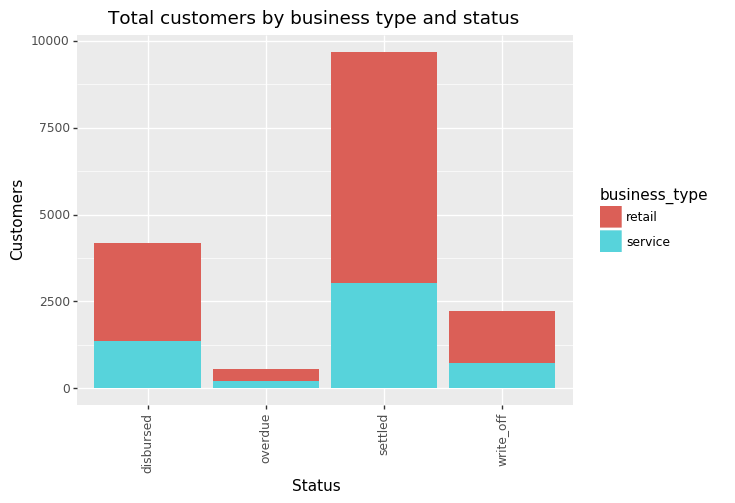

<ggplot: (7570282686)>

In [302]:

(p9.ggplot(data=customers_by_bstyp_sttts,
           mapping=p9.aes(x='factor(status)',
                          y='customers',
                          fill='business_type'))
                         
    + p9.geom_bar(stat = "identity")+my_custom_theme+
  p9.ggtitle("Total customers by business type and status ") + p9.xlab("Status") + p9.ylab("Customers")
    
    
)

# Loans

## Total Distinct Loans by loan Status

In [231]:
loans_by_stts =pysqldf("""with a as (select count(distinct loan_id) loans,status
                      from data
                      group by 2
                      order by 1 desc)
                      ,b as (select count(distinct loan_id) Total_loans from data)
                        select * ,round(cast(loans as float)/cast(Total_loans as float),4) Ratio from a,b;""")
loans_by_stts

,loans,status,Total_loans,Ratio
0,49905,settled,56870,0.8775
1,4194,disbursed,56870,0.0737
2,2223,write_off,56870,0.0391
3,548,overdue,56870,0.0096


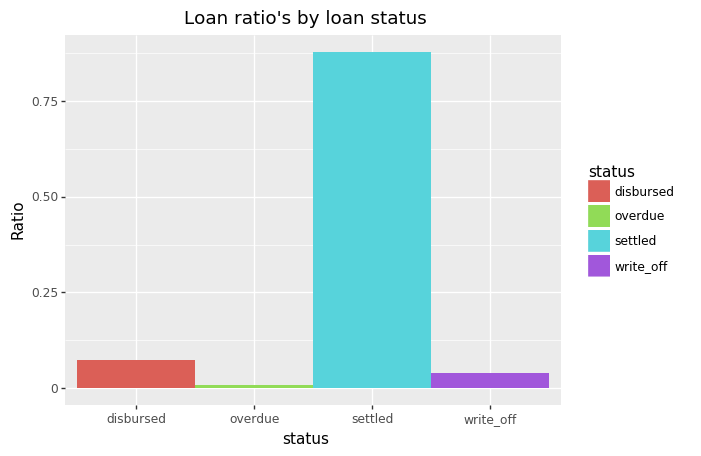

<ggplot: (7566994885)>

In [303]:
(p9.ggplot(data=loans_by_stts,
           mapping=p9.aes(x="status",
                          y='Ratio',
                          fill='status'))
                         
    + p9.geom_bar(width = 1, stat = "identity")+
  p9.ggtitle("Loan ratio's by loan status") + p9.xlab("status") + p9.ylab("Ratio")
    
)


## Total Distinct Loans by Business type

In [304]:
loans_by_bstyp =pysqldf("""with a as (select count(distinct loan_id) loans,business_type
                        from
                      data
                      group by 2
                      order by 1 desc),b as (select count(distinct loan_id) Total_loans from data)
                        select * ,round(cast(loans as float)/Total_loans,4) Ratio from a,b;""")
loans_by_bstyp

,loans,business_type,Total_loans,Ratio
0,42889,retail,56870,0.7542
1,13981,service,56870,0.2458


In [242]:
loans_by_bstyp_sttts =pysqldf("""with a as (select count(distinct loan_id) loans,business_type,status
                        from
                      data
                      group by 2,3
                      order by 2 desc),b as (select count(distinct loan_id) Total_loans ,business_type from data group by business_type)
                        select loans,a.business_type,status ,Total_loans ,round(cast(loans as float)/cast(Total_loans as flaot),4) Ratio from a join b on b.business_type=a.business_type  ;""")
loans_by_bstyp_sttts

,loans,business_type,status,Total_loans,Ratio
0,1370,service,disbursed,13981,0.0980
1,210,service,overdue,13981,0.0150
2,11674,service,settled,13981,0.8350
3,727,service,write_off,13981,0.0520
4,2824,retail,disbursed,42889,0.0658
5,338,retail,overdue,42889,0.0079
6,38231,retail,settled,42889,0.8914
7,1496,retail,write_off,42889,0.0349


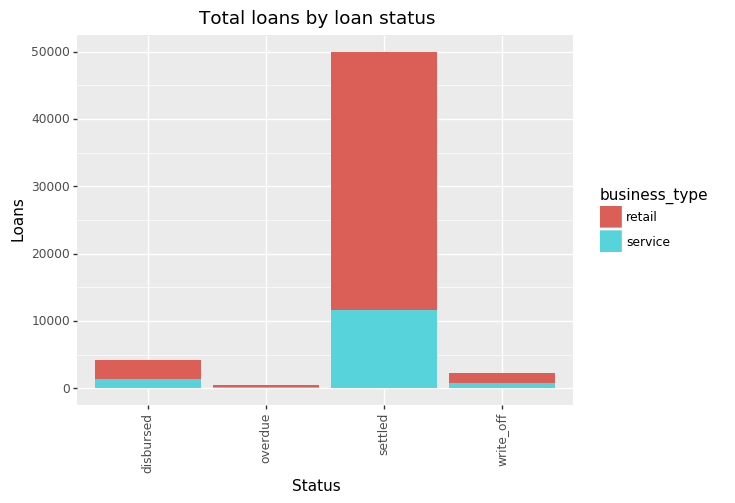

<ggplot: (7566523677)>

In [305]:

(p9.ggplot(data=loans_by_bstyp_sttts,
           mapping=p9.aes(x='factor(status)',
                          y='loans',
                          fill='business_type'))
                         
    + p9.geom_bar(stat = "identity")+my_custom_theme
 +
  p9.ggtitle("Total loans by loan status") + p9.xlab("Status") + p9.ylab("Loans")
    
)

## Total loans disbursed 

In [54]:
total_loans_disbursed =pysqldf("""select count(distinct loan_id) total_loans_disbursed,status
                      from data
                      where status='disbursed'
                     ;""")

total_loans_disbursed

,total_loans_disbursed,status
0,4194,disbursed


## Total loans disbursed by day

In [246]:
total_loans_disbursed_day =pysqldf("""select cast(count(distinct loan_id) as float) total_loans_disbursed,date_issued
                      from data
                      where status='disbursed'
                      group by 2
                     ;""")

total_loans_disbursed_day

,total_loans_disbursed,date_issued
0,42.0,2018-12-02
1,185.0,2018-12-03
2,110.0,2018-12-04
3,114.0,2018-12-05
4,115.0,2018-12-06
5,112.0,2018-12-07
6,13.0,2018-12-08
7,67.0,2018-12-09
8,209.0,2018-12-10
9,140.0,2018-12-11


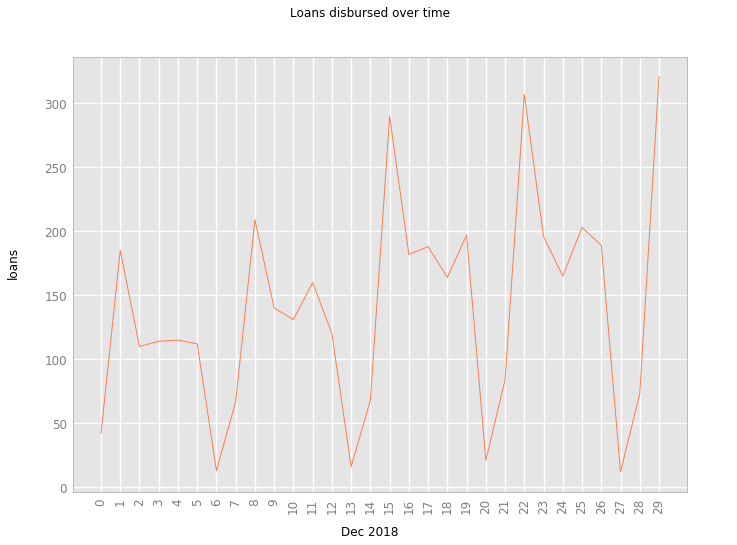

<ggplot: (7564623038)>

In [345]:
ggplot(total_loans_disbursed_day, aes('date_issued','total_loans_disbursed')) + \
    geom_line(color='coral')+ my_custom_theme_2+ggtitle("Loans disbursed over time") + xlab("Dec 2018") + ylab("loans")



## Overal repayment rate,Total Amount ,Total Paid Amount 

In [59]:
Overal_repayment_rate =pysqldf("""with a as (select sum(l.amount +l.Interest+l.penalties) total_amount
                    
                      from data l),b as (select sum(p.payment_amount) paid_amount from data p) 
                      select *,(paid_amount/total_amount) Repayment_rate 
                      from a,b
                     ;""")

Overal_repayment_rate

,total_amount,paid_amount,Avg_Repayment_rate
0,23660459.0,17214301.38,0.727556


## Overal repayment rate by month 

In [249]:
##Overal_repayment_rate by month 
repayment_rate =pysqldf("""with a as (select sum(l.amount +l.Interest+l.penalties) total_amount,
            month_date_issued  from data as l group by 2),
          b as (select sum(p.payment_amount) paid_amount,month_payment_date 
                from data as p group by 2)
        select *,paid_amount/total_amount Repayment_rate 
        from a join b on a.month_date_issued=b.month_payment_date;""")
repayment_rate

,total_amount,month_date_issued,paid_amount,month_payment_date,Repayment_rate
0,205276.99,2017-01-01,26515.44,2017-01-01,0.129169
1,292036.98,2017-02-01,144582.77,2017-02-01,0.495084
2,456097.92,2017-03-01,258603.03,2017-03-01,0.566990
3,473917.98,2017-04-01,303488.59,2017-04-01,0.640382
4,561671.56,2017-05-01,359142.89,2017-05-01,0.639418
5,705721.23,2017-06-01,405063.45,2017-06-01,0.573971
6,810515.35,2017-07-01,520468.61,2017-07-01,0.642145
7,889995.81,2017-08-01,599365.56,2017-08-01,0.673448
8,860167.79,2017-09-01,615550.71,2017-09-01,0.715617
9,990245.55,2017-10-01,652463.17,2017-10-01,0.658890


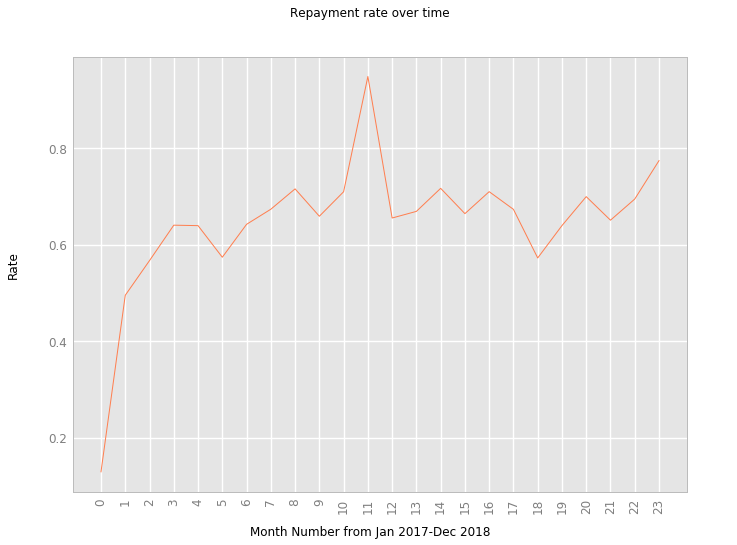

<ggplot: (-9223372029278840674)>

In [347]:
ggplot(repayment_rate, aes('month_payment_date','Repayment_rate')) + \
    geom_line(color='coral')+ my_custom_theme_2+ggtitle("Repayment rate over time") + xlab("Month Number from Jan 2017-Dec 2018") + ylab("Rate")



## Bullet payment propotions over time

In [256]:
## Bullet9 payment_propotions over_time
bullet_payments_propotion =pysqldf('''with a as (select count(distinct loan_id ) bullet_payment_loans,
                      month_payment_date
                      from  data
                      where status = "settled"
                      and ((amount +Interest+penalties)-(payment_amount)) =0
                      group by 2
                      order by 1 desc),
                                    b as (select count(distinct loan_id) total_loans,
                                    month_date_issued  from data
                        
                        group by 2
                        order by 1
                                 ) 
                                 select * , cast(bullet_payment_loans as float)/total_loans bullet_payments_propotion 
                                 from a join b on a.month_payment_date=b.month_date_issued''')
bullet_payments_propotion

,bullet_payment_loans,month_payment_date,total_loans,month_date_issued,bullet_payments_propotion
0,3619,2018-12-01,4893,2018-12-01,0.739628
1,3314,2018-11-01,4622,2018-11-01,0.717006
2,3132,2018-10-01,4668,2018-10-01,0.670951
3,2763,2018-09-01,3765,2018-09-01,0.733865
4,2629,2018-08-01,3919,2018-08-01,0.670834
5,1947,2018-07-01,3353,2018-07-01,0.580674
6,1717,2018-06-01,2396,2018-06-01,0.716611
7,1683,2017-11-01,2269,2017-11-01,0.741736
8,1680,2017-12-01,1684,2017-12-01,0.997625
9,1675,2018-05-01,2331,2018-05-01,0.718576


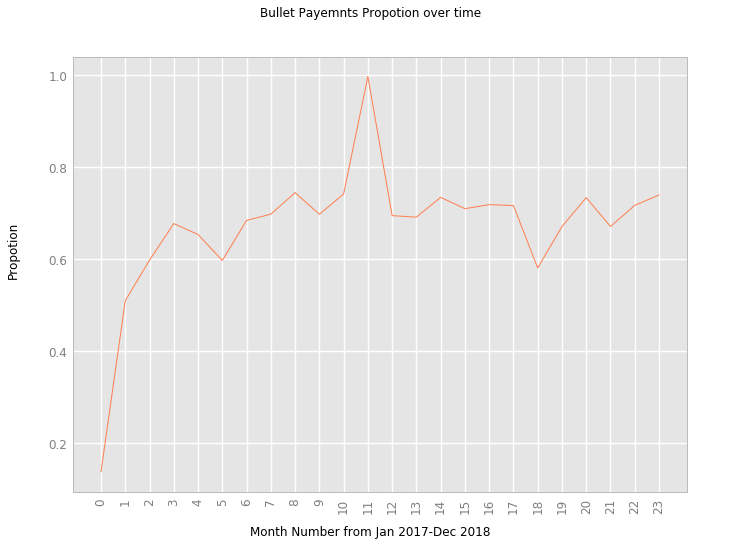

<ggplot: (7575994877)>

In [361]:
ggplot(bullet_payments_propotion, aes('month_payment_date','bullet_payments_propotion')) + \
    geom_line(color='coral')+ my_custom_theme_2+ggtitle("Bullet Payemnts Propotion over time") + xlab("Month Number from Jan 2017-Dec 2018") + ylab("Propotion")


## Domancy rate over time

In [316]:
domancy_rate_ =pysqldf(''' with a as 
                       (select customer_id,
                        loan_id,
                        month_date_issued,
                        date_issued ,
                        lag(date_issued,1,0) OVER (ORDER BY 1,2,3,4) date_2,
                        status
                        from data where status = "settled" order by 1,2,3,4)
                         select * ,(date_issued-date_2) from a ''')
from datetime import date
date_format = "%T-%m-d"
a = datetime.strptime(domancy_rate_[['date_issued']], date_format)
b = datetime.strptime(domancy_rate_[['date_2']], date_format)



TypeError: strptime() argument 1 must be str, not DataFrame

## Retention Rate over time

In [ ]:
query_3 ='''with a as (select l.customer_id,l.loan_id ,DATE_FORMAT(l.date_issued,'%Y-%m-01') month_date_issued 
            ,l.date_issued ,min(l2.date_issued) date_issued_2,DATEDIFF(l2.date_issued,l2.date_issued) days 
            from 4gcapital.loans as l left join 4gcapital.loans as l2 on l.customer_id =l2.customer_id 
            where l.status = 'settled'  
            and l2.date_issued>l.date_issued 
            and DATEDIFF(l2.date_issued,l2.date_issued)<45
            group by 1,2,3,4 order by 1,2,3,4) ,
            b as (select count(distinct loan_id) domant_loans,month_date_issued 
                                              from a
                                              group by 2
                                              order by 2),
            c as (select count(distinct loan_id) total_loans,DATE_FORMAT(date_issued,'%Y-%m-01') month_date_issued
            from 4gcapital.loans
                        
                        group by 2
                        order by 1
                                 )   
          select b.domant_loans/c.total_loans domancy_rate,c.month_date_issued from b join c 
                                 on b.month_date_issued=c.month_date_issued'''
domancy_rate_=pd.read_sql(query_3, connection)
domancy_rate_

## Write Off rate by month


In [367]:
write_off_rat=pysqldf("""with a as (select count(distinct loan_id) written_off_loans,month_date_issued 
                                              from data
                                              where status="write_off"
                                              group by 2
                                              order by 2),
                                    b as (select count(distinct loan_id) total_loans,month_date_issued  month_date_issued_2 from data
                        
                        group by 2
                        order by 1
                                 )   select *,cast(written_off_loans as float)/total_loans write_off_rate from a join b on a.month_date_issued=b.month_date_issued_2""")
write_off_rat

,written_off_loans,month_date_issued,total_loans,month_date_issued_2,write_off_rate
0,22,2017-01-01,512,2017-01-01,0.042969
1,37,2017-02-01,742,2017-02-01,0.049865
2,46,2017-03-01,1074,2017-03-01,0.042831
3,52,2017-04-01,1094,2017-04-01,0.047532
4,60,2017-05-01,1345,2017-05-01,0.044610
5,76,2017-06-01,1680,2017-06-01,0.045238
6,81,2017-07-01,1913,2017-07-01,0.042342
7,88,2017-08-01,2101,2017-08-01,0.041885
8,77,2017-09-01,2060,2017-09-01,0.037379
9,104,2017-10-01,2348,2017-10-01,0.044293


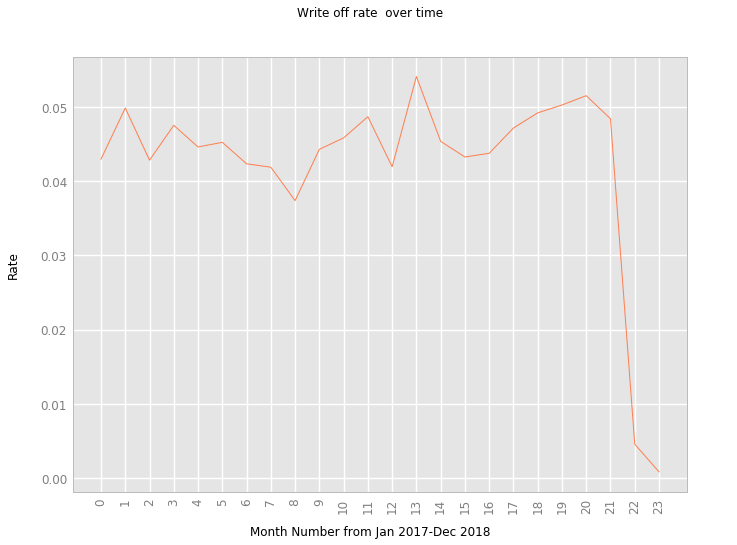

<ggplot: (7572979341)>

In [368]:
ggplot(write_off_rat, aes('month_date_issued','write_off_rate')) + \
geom_line(color='coral')+ my_custom_theme_2+ggtitle("Write off rate  over time") + xlab("Month Number from Jan 2017-Dec 2018") + ylab("Rate")



## Setteled loans

In [73]:
setteled_loans=pysqldf("""select distinct loan_id ,max(payment_date-date_issued) days_to_pay
                      from data
                      where status = "settled"
                      group by 1
                      order by 1 desc""")
setteled_loans

,loan_id,days_to_pay
0,1055040,0
1,1054744,0
2,1054536,0
3,1054530,0
4,1054525,0
...,...,...
49900,1000005,0
49901,1000004,0
49902,1000003,0
49903,1000002,0


## Bullet Payment propotion by month

In [258]:
Bullet_Payment_propotion =pysqldf('''with a as (select count(distinct loan_id) setteled_loans,
                         month_payment_date 
                         
                        from
                     data
                      where status = "settled"
                      and ((amount +Interest+penalties)-(payment_amount)) =0
                      group by 2
                      order by 1 desc),
                                    b as (select count(distinct loan_id) total_loans,
                                    month_date_issued from data
                        
                        group by 2
                        order by 1
                                 )   select * ,cast(setteled_loans as float)/total_loans bullet_payments_rate  
                                 from a join b on a.month_payment_date=b.month_date_issued
            ;''')
Bullet_Payment_propotion

,setteled_loans,month_payment_date,total_loans,month_date_issued,bullet_payments_rate
0,3619,2018-12-01,4893,2018-12-01,0.739628
1,3314,2018-11-01,4622,2018-11-01,0.717006
2,3132,2018-10-01,4668,2018-10-01,0.670951
3,2763,2018-09-01,3765,2018-09-01,0.733865
4,2629,2018-08-01,3919,2018-08-01,0.670834
5,1947,2018-07-01,3353,2018-07-01,0.580674
6,1717,2018-06-01,2396,2018-06-01,0.716611
7,1683,2017-11-01,2269,2017-11-01,0.741736
8,1680,2017-12-01,1684,2017-12-01,0.997625
9,1675,2018-05-01,2331,2018-05-01,0.718576


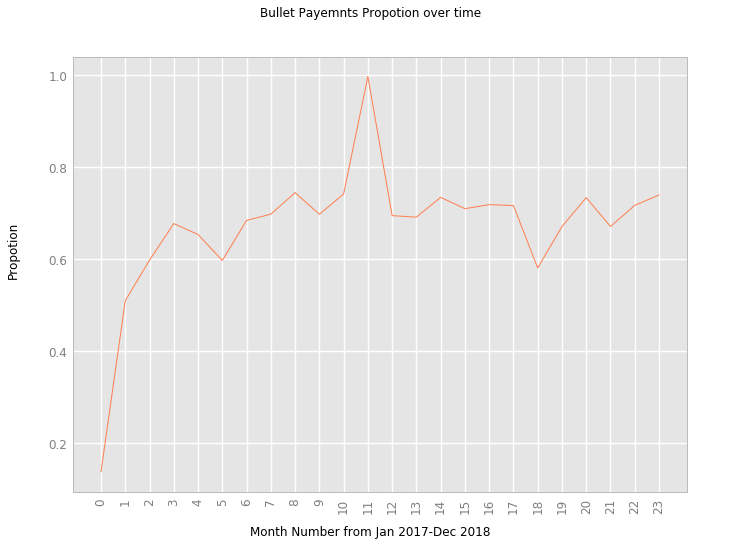

<ggplot: (7574327609)>

In [362]:
ggplot(bullet_payments_propotion, aes('month_payment_date','bullet_payments_propotion')) + \
    geom_line(color='coral')+ my_custom_theme_2+ggtitle("Bullet Payemnts Propotion over time") + xlab("Month Number from Jan 2017-Dec 2018") + ylab("Propotion")



## Bullet payments rate

In [259]:
bullet_payments_rate=pysqldf("""with a as (select count(distinct loan_id) setteled_loans,business_type
                      from data
                      where status = "settled"
                      and ((amount +Interest+penalties)-(payment_amount)) =0
                      group by 2
                      order by 1 desc),
                                    b as (select count(distinct loan_id) total_loans,business_type from data  group by 2
                        
                        
                        order by 1 
                                 )   select *,cast(setteled_loans as float)/total_loans from a join b on a.business_type=b.business_type;""")
bullet_payments_rate

,setteled_loans,business_type,total_loans,business_type,cast(setteled_loans as float)/total_loans
0,29842,retail,42889,retail,0.695796
1,9716,service,13981,service,0.694943


## Customers by pleasant demeanour status(0,1)

In [80]:
flag_has_pleasant_demeanour =pysqldf('''select count(distinct loan_id) setteled_loans, customer_id ,flag_has_pleasant_demeanour
                      from data
                      where status = "settled"
                      group by 2,3
                      order by 1 desc
            ''')
flag_has_pleasant_demeanour

,setteled_loans,customer_id,flag_has_pleasant_demeanour
0,29,100042,1
1,29,100911,1
2,28,100040,1
3,27,100021,1
4,27,100033,1
...,...,...,...
9670,1,110475,1
9671,1,110478,1
9672,1,110479,1
9673,1,110483,1


## Customers by pleasant demeanour status(1)

In [365]:
pleasant_demeanour_per =pysqldf('''with a as ( select count(distinct customer_id) customers , month_date_added
                      from data
                      where status = "settled"
                      and flag_has_pleasant_demeanour =1
                      group by 2
                      order by 1 desc),
                   b as   (select count(distinct customer_id) total_customers, month_date_added from data
                        --where date_added_year =2017
                        group by 2
                        order by 2)
                        
                                 select customers,a.month_date_added,total_customers
                                 ,cast(customers as flaot)/cast(total_customers as float) ratio from a join b on a.month_date_added =  b.month_date_added
            ''')
pleasant_demeanour_per

,customers,month_date_added,total_customers,ratio
0,742,2018-07-01,1005,0.738308
1,690,2018-10-01,913,0.755750
2,674,2018-08-01,880,0.765909
3,576,2018-11-01,788,0.730964
4,500,2018-09-01,658,0.759878
5,368,2017-06-01,492,0.747967
6,349,2017-01-01,445,0.784270
7,347,2018-06-01,443,0.783296
8,313,2017-07-01,405,0.772840
9,290,2018-03-01,355,0.816901


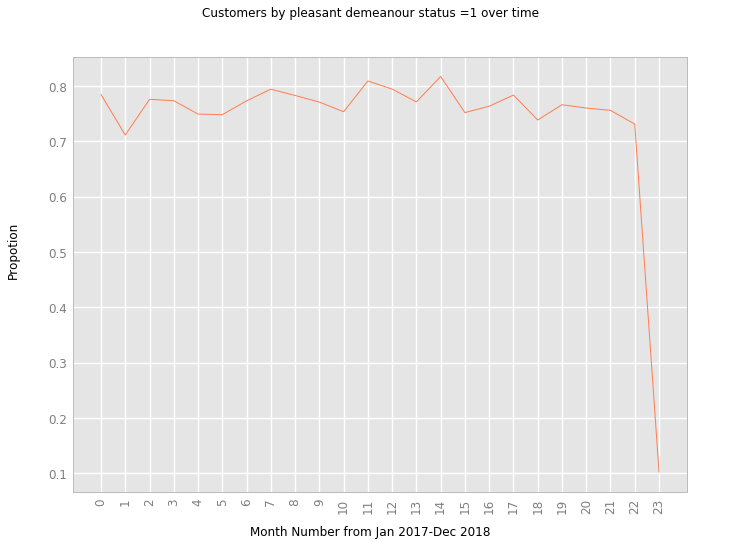

<ggplot: (-9223372029280215166)>

In [366]:
ggplot(pleasant_demeanour_per, aes('month_date_added','ratio')) + \
    geom_line(color='coral')+ my_custom_theme_2+ggtitle("Customers by pleasant demeanour status =1 over time") + xlab("Month Number from Jan 2017-Dec 2018") + ylab("Propotion")

